In [232]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [233]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic')
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic


In [234]:
df = pd.read_csv("./Python/output/ExpVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,exp,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,Gaussian,0.2,-100,3.720076e-44,1.003660,-2.624914,6.561486,7.694965e-45,7.666905e-45,7.348603e-46,...,0.201048,0.177366,0.119420,0.097753,0.085660,0.051900,0.045853,0.030737,0.021667,0.020155
1,Uniform,0.2,-100,3.720076e-44,0.986129,-1.420593,2.008694,7.560554e-45,7.666905e-45,7.486427e-46,...,0.242476,0.234977,0.226977,0.220478,0.213479,0.009499,0.000000,0.000000,0.000000,0.000000
2,Gaussian,0.2,-50,1.928750e-22,1.003660,-2.624914,6.561486,3.989613e-23,3.975064e-23,3.810034e-24,...,0.201048,0.177366,0.119420,0.097753,0.085660,0.051900,0.045853,0.030737,0.021667,0.020155
3,Uniform,0.2,-50,1.928750e-22,0.986129,-1.420593,2.008694,3.919925e-23,3.975064e-23,3.881492e-24,...,0.242476,0.234977,0.226977,0.220478,0.213479,0.009499,0.000000,0.000000,0.000000,0.000000
4,Gaussian,0.2,-20,2.061154e-09,1.003660,-2.624914,6.561486,4.263489e-10,4.247942e-10,4.071583e-11,...,0.201048,0.177366,0.119420,0.097753,0.085660,0.051900,0.045853,0.030737,0.021667,0.020155


In [235]:
sorted(df['Noise'].unique())

[1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 0.2]

In [236]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [237]:
df[(df['X']==0) & (df['Noise'].isin(sNoise))][['NoiseType', 'Noise', 'X', 'Value Deviation', 'Uncertainty', 
                                               'Error Deviation', 'Mean', 'Bias']].head(100)

,NoiseType,Noise,X,Value Deviation,Uncertainty,Error Deviation,Mean,Bias
14,Gaussian,0.2000,0,0.206850,0.206095,1.003660,1.975391e-02,2.020103e-02
15,Uniform,0.2000,0,0.203237,0.206095,0.986129,2.012439e-02,2.020103e-02
44,Gaussian,0.1000,0,0.099734,0.100752,0.989895,5.393533e-03,5.012448e-03
45,Uniform,0.1000,0,0.100411,0.100752,0.996610,5.008508e-03,5.012448e-03
74,Gaussian,0.0100,0,0.009934,0.010001,0.993365,3.856769e-05,5.000053e-05
75,Uniform,0.0100,0,0.010001,0.010001,1.000072,5.001075e-05,5.000053e-05
104,Gaussian,0.0010,0,0.001008,0.001000,1.008466,-1.105148e-05,4.999930e-07
105,Uniform,0.0010,0,0.001000,0.001000,1.000107,5.001001e-07,4.999930e-07
134,Gaussian,0.0001,0,0.000100,0.000100,0.999712,1.054438e-06,4.999928e-09
135,Uniform,0.0001,0,0.000100,0.000100,1.000107,5.001000e-09,4.999928e-09


In [238]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['+', '-', '--', 'x'], sColor = ['r','g','b','y','c','m'],
                logx=False, logy=True, xlim=[-10, 10], ylim=[1e-9, 1e+5], bbox=(1.15, 1.0)):
    fig, ax = plt.subplots()
    if logx:
        ax.set_xscale('log')
    if xlim:
        ax.set_xlim(xlim)
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise) ]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}', markersize=10)
    ax.legend(bbox_to_anchor=bbox)

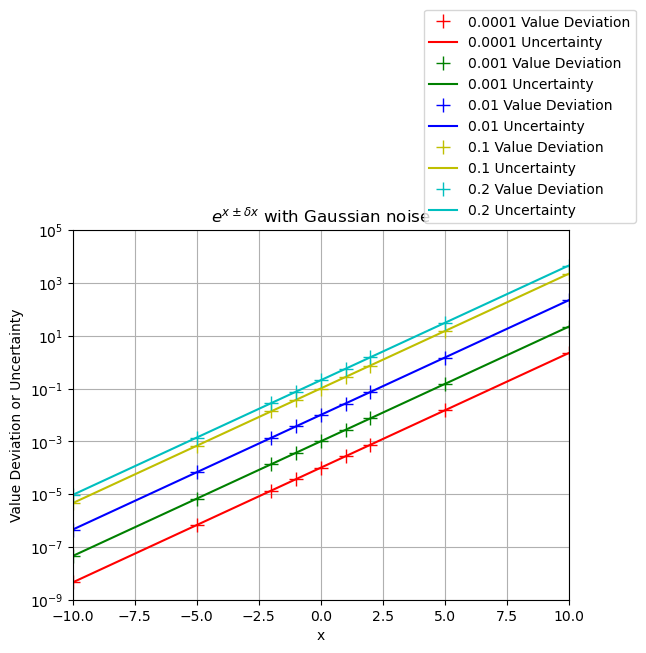

In [239]:
PlotValues()

In [240]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sNoise,
                  sColor=['r','g','b','y','c','m'], xlim=(-10, 10), ylim=(1e-9, 1e5) ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_xlim(xlim)
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim(ylim)
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.24, 1.0))
    ax2.legend(bbox_to_anchor=(1.68, 0.3))

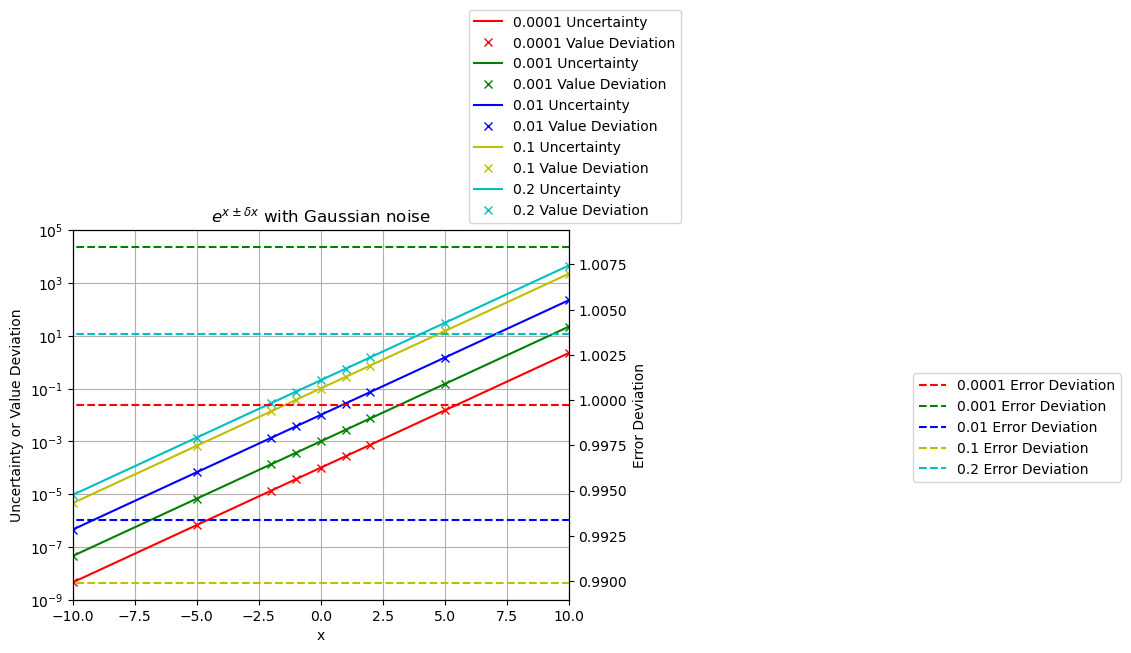

In [241]:
PlotErrorDev()

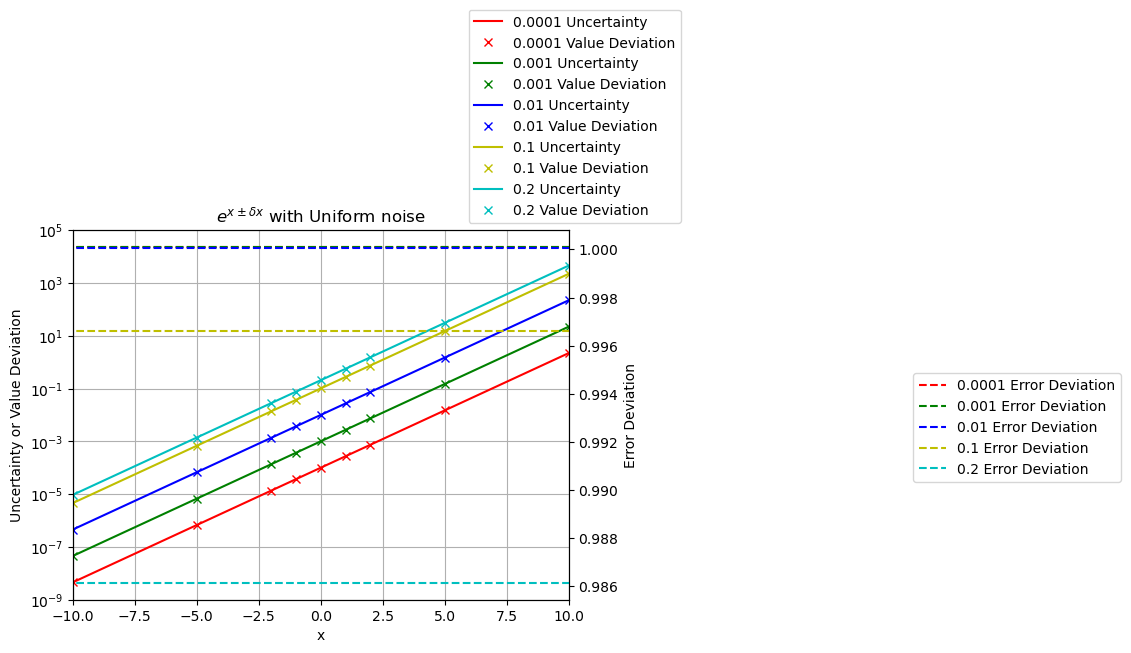

In [242]:
PlotErrorDev('Uniform')

# Mean vs Bias

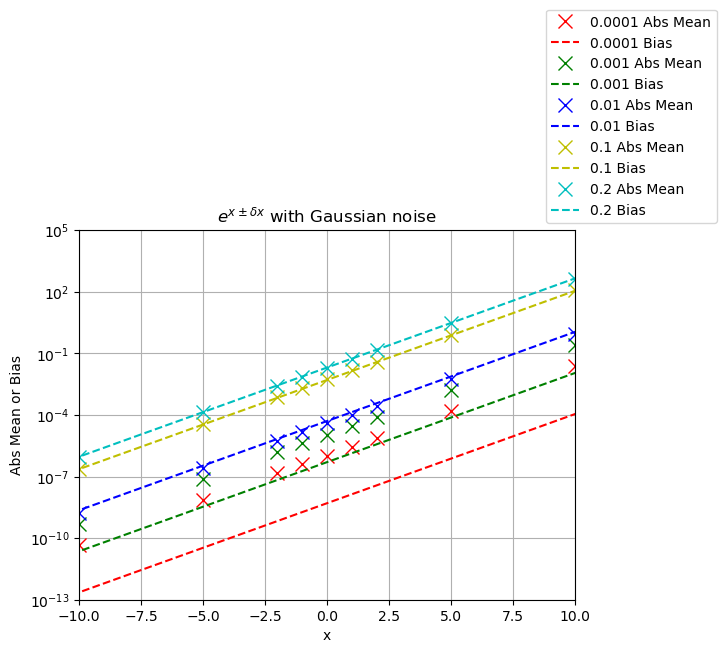

In [243]:
df['Abs Mean'] = abs(df['Mean'])
PlotValues(sValue=['Abs Mean', 'Bias'], sStyle=['x', '--'], ylim=[1e-13, 1e+5], bbox=(1.3, 1.0))

# Error Maximum and Minimum

# Histogram

In [244]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

,-2.9,-2.7,-2.5,-2.3,-2.1,-1.9,-1.7,-1.5,-1.3,-1.1,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,0.0,0.001008,0.002016,0.005543,0.013605,0.031744,0.066008,0.098257,0.178373,0.248413,...,0.201048,0.177366,0.119420,0.097753,0.085660,0.051900,0.045853,0.030737,0.021667,0.020155
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043496,0.406459,0.384462,...,0.242476,0.234977,0.226977,0.220478,0.213479,0.009499,0.000000,0.000000,0.000000,0.000000
2,0.0,0.001008,0.002016,0.005543,0.013605,0.031744,0.066008,0.098257,0.178373,0.248413,...,0.201048,0.177366,0.119420,0.097753,0.085660,0.051900,0.045853,0.030737,0.021667,0.020155
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043496,0.406459,0.384462,...,0.242476,0.234977,0.226977,0.220478,0.213479,0.009499,0.000000,0.000000,0.000000,0.000000
4,0.0,0.001008,0.002016,0.005543,0.013605,0.031744,0.066008,0.098257,0.178373,0.248413,...,0.201048,0.177366,0.119420,0.097753,0.085660,0.051900,0.045853,0.030737,0.021667,0.020155


In [245]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


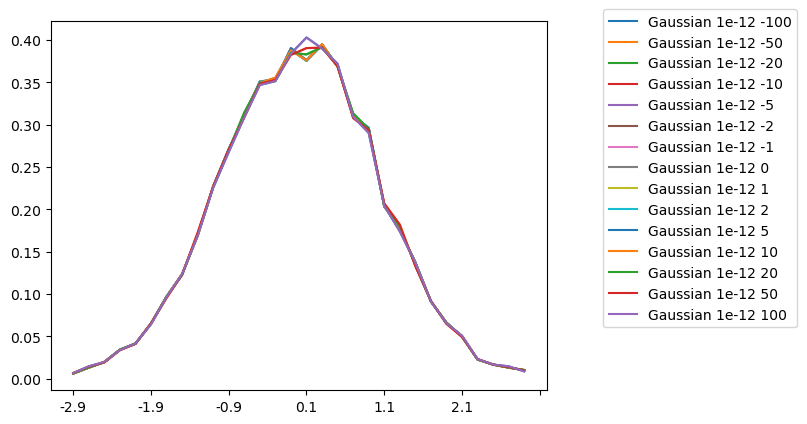

In [246]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-12])

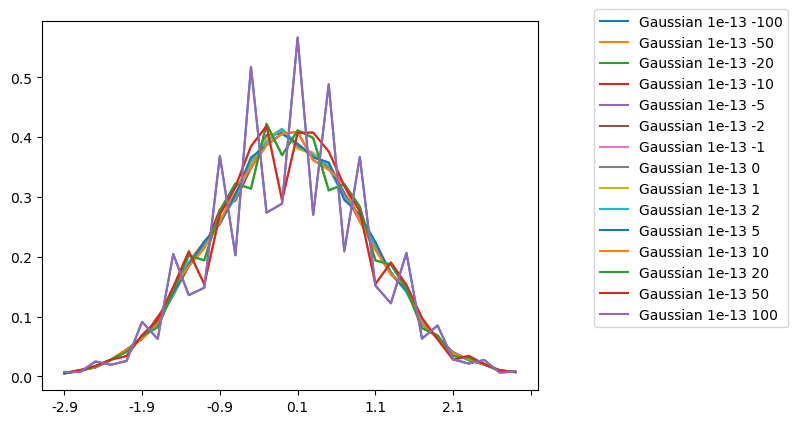

In [247]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-13])

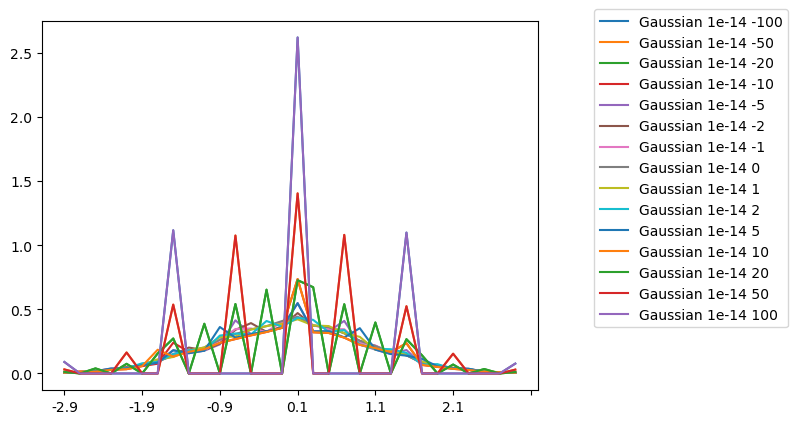

In [248]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-14])

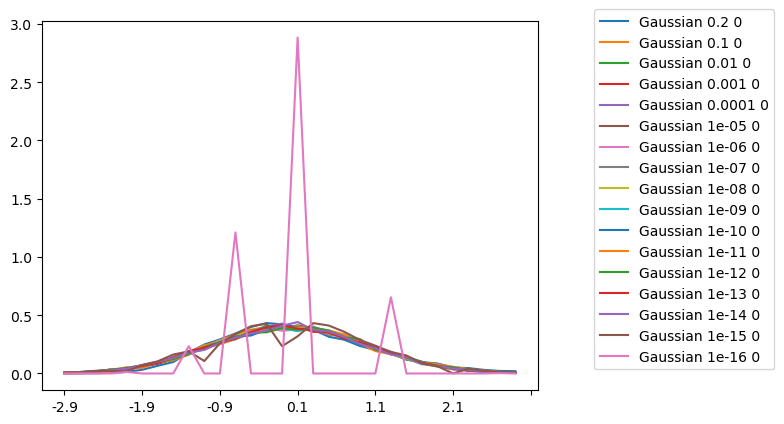

In [249]:
PlotHisto(sNoiseType=['Gaussian'], sX=[0])

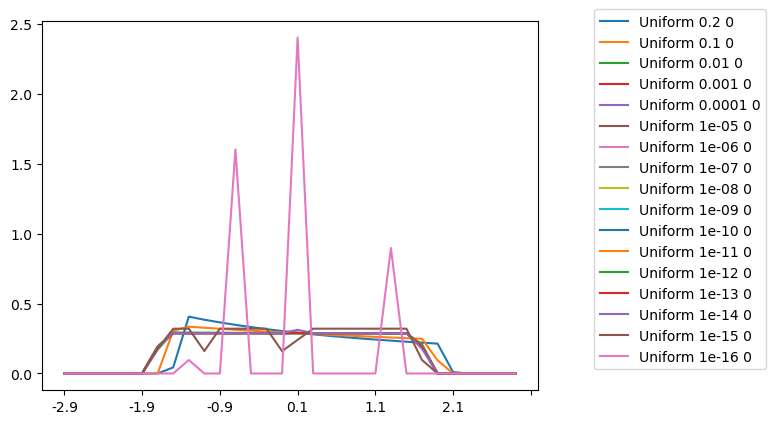

In [250]:
PlotHisto(sNoiseType=['Uniform'], sX=[0])

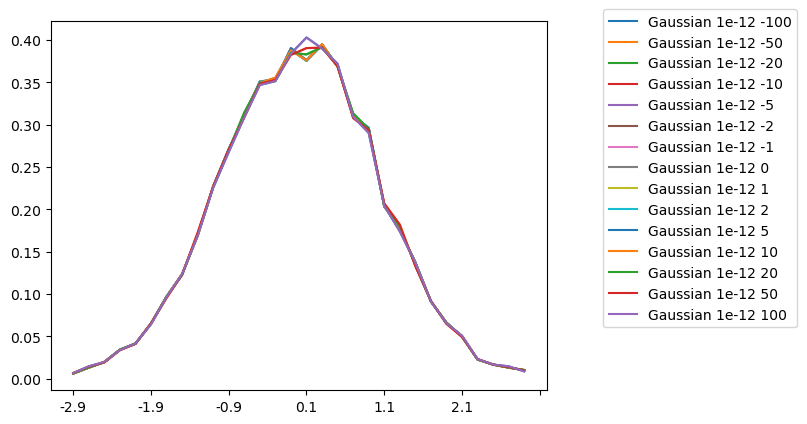

In [251]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-12])